In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from library.sb_utils import save_file

### Load the Data

In [2]:
retail_data = pd.read_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/data_cleaned.csv')

###### Explore the data

In [4]:
retail_data.head(10)

Store  Dept      Date  Weekly_Sales  IsHoliday_x Type    Size  Temperature  \
0      1     1  5/2/2010      24924.50        False    A  151315        42.31   
1      1     2  5/2/2010      50605.27        False    A  151315        42.31   
2      1     3  5/2/2010      13740.12        False    A  151315        42.31   
3      1     4  5/2/2010      39954.04        False    A  151315        42.31   
4      1     5  5/2/2010      32229.38        False    A  151315        42.31   
5      1     6  5/2/2010       5749.03        False    A  151315        42.31   
6      1     7  5/2/2010      21084.08        False    A  151315        42.31   
7      1     8  5/2/2010      40129.01        False    A  151315        42.31   
8      1     9  5/2/2010      16930.99        False    A  151315        42.31   
9      1    10  5/2/2010      30721.50        False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   
5       2.572        0.0        0.0        0.0        0.0        0.0   
6       2.572        0.0        0.0        0.0        0.0        0.0   
7       2.572        0.0        0.0        0.0        0.0        0.0   
8       2.572        0.0        0.0        0.0        0.0        0.0   
9       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  IsHoliday_y  
0  211.096358         8.106        False  
1  211.096358         8.106        False  
2  211.096358         8.106        False  
3  211.096358         8.106        False  
4  211.096358         8.106        False  
5  211.096358         8.106        False  
6  211.096358         8.106        False  
7  211.096358         8.106        False  
8  211.096358         8.106        False  
9  211.096358         8.106        False

In [5]:
#Check if there are any null values in the data.
retail_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

In [6]:
retail_data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
dtype: object

##### Summary statistics

In [7]:
#Let's find out what the maximun Weekly-sales was .
retail_data.Weekly_Sales.sort_values(ascending=False).head()

90645     693099.36
337053    649770.18
94393     630999.19
333594    627962.93
131088    474330.10
Name: Weekly_Sales, dtype: float64

In [8]:
#Let's calculate the average sales throughout the year
retail_data.Weekly_Sales.mean()

15981.258123467327

In [9]:
#Calculate the median for Weekly sales 
retail_data.Weekly_Sales.median()

7612.03

In [10]:
retail_data.Weekly_Sales.mode()

0    10.0
dtype: float64

In [11]:
#Let's find the minimum Weekly-sales
retail_data.Weekly_Sales.sort_values(ascending=True).head()

269456   -4988.94
336241   -3924.00
412178   -1750.00
155177   -1699.00
271178   -1321.48
Name: Weekly_Sales, dtype: float64

##### Visual Exploratory Analysis

array([[<AxesSubplot:title={'center':'Weekly_Sales'}>]], dtype=object)

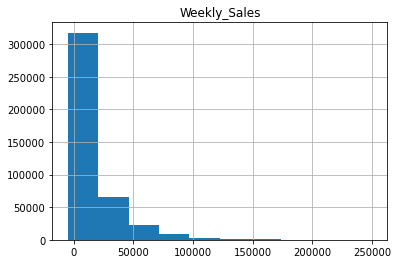

In [12]:
#Lets' plot a histogram for Weekly_Sales data column
retail_data.hist(column='Weekly_Sales', range=[-5000,250000]) # x is column and y is count
#Ref: To set range for matplotlib histogram-
#https://stackoverflow.com/questions/12125880/changing-default-x-range-in-histogram-matplotlib

array([[<AxesSubplot:title={'center':'Dept'}>]], dtype=object)

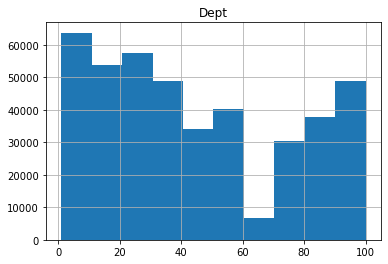

In [13]:
#Lets' plot a histogram for Department column
retail_data.hist(column='Dept',range=[1,100])

Text(0.5, 0, 'Dept')

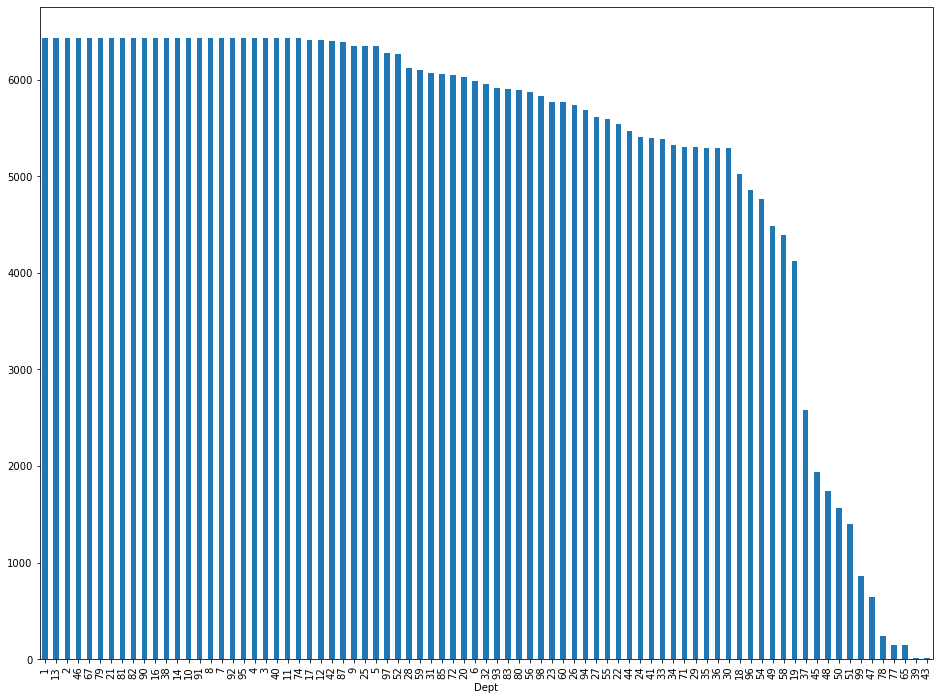

In [14]:
#plotting a bar graph for the entire 'Dept'  column
plt.figure(figsize=(16,12))
retail_data.Dept.value_counts().plot(kind='bar')
plt.xlabel('Dept')

In [15]:
#plotting bar graph for only the first 25 rows
#Dept = retail_data['Dept'].head(25)
#values = retail_data.Dept.value_counts().head(25)
#fig = plt.figure(figsize = (16, 12))
#plt.barh(Dept[0:25],values[0:25])

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Date'>

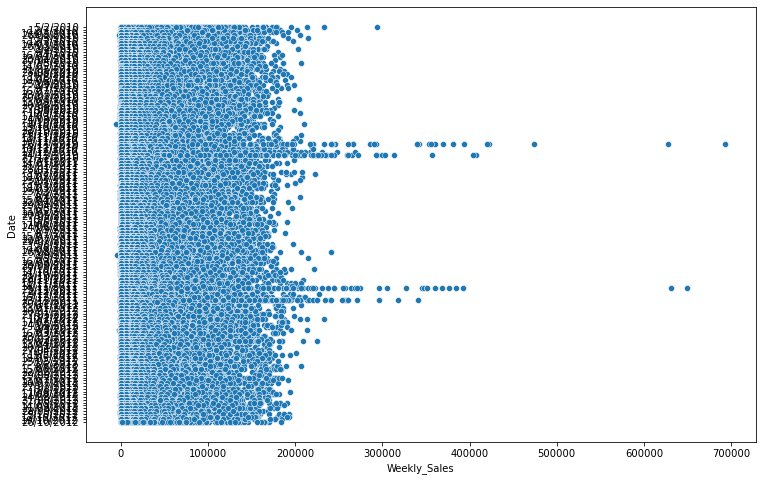

In [16]:
#Let's plot scatter plot
#sns.scatterplot(x='density', y='fixed.acidity', data=wine)
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='Date', data=retail_data)

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Temperature'>

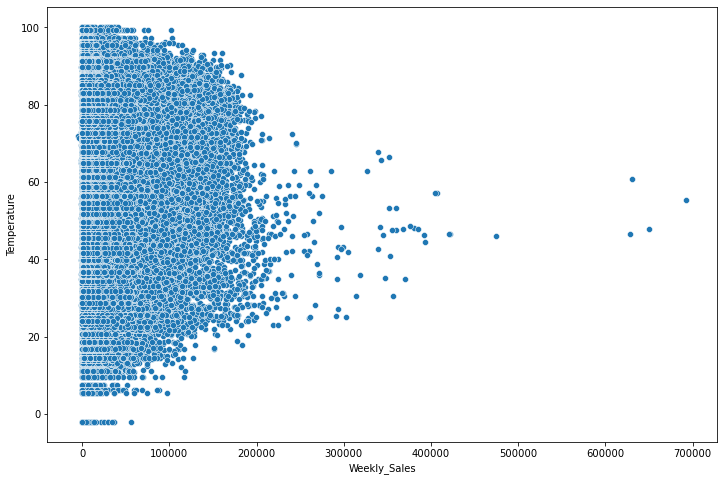

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='Temperature', data=retail_data)

<AxesSubplot:xlabel='Weekly_Sales', ylabel='MarkDown1'>

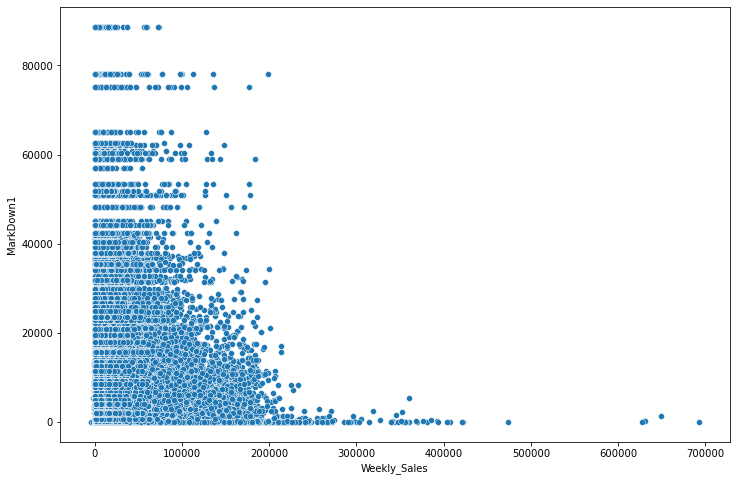

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='MarkDown1', data=retail_data)

<AxesSubplot:xlabel='Weekly_Sales', ylabel='MarkDown2'>

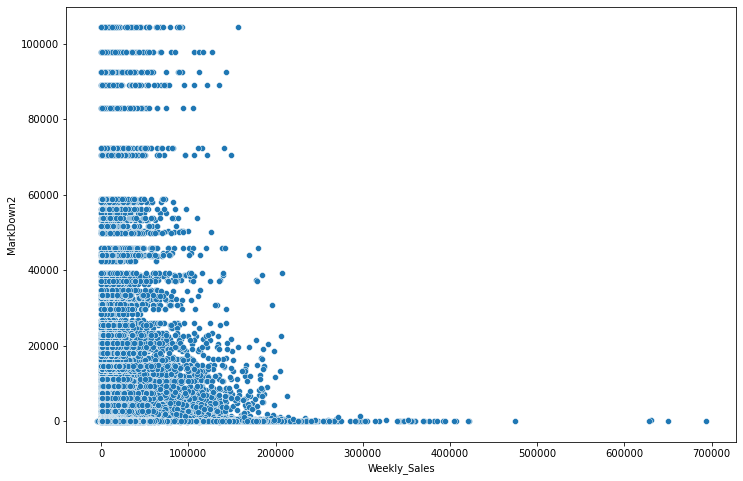

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='MarkDown2', data=retail_data)

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

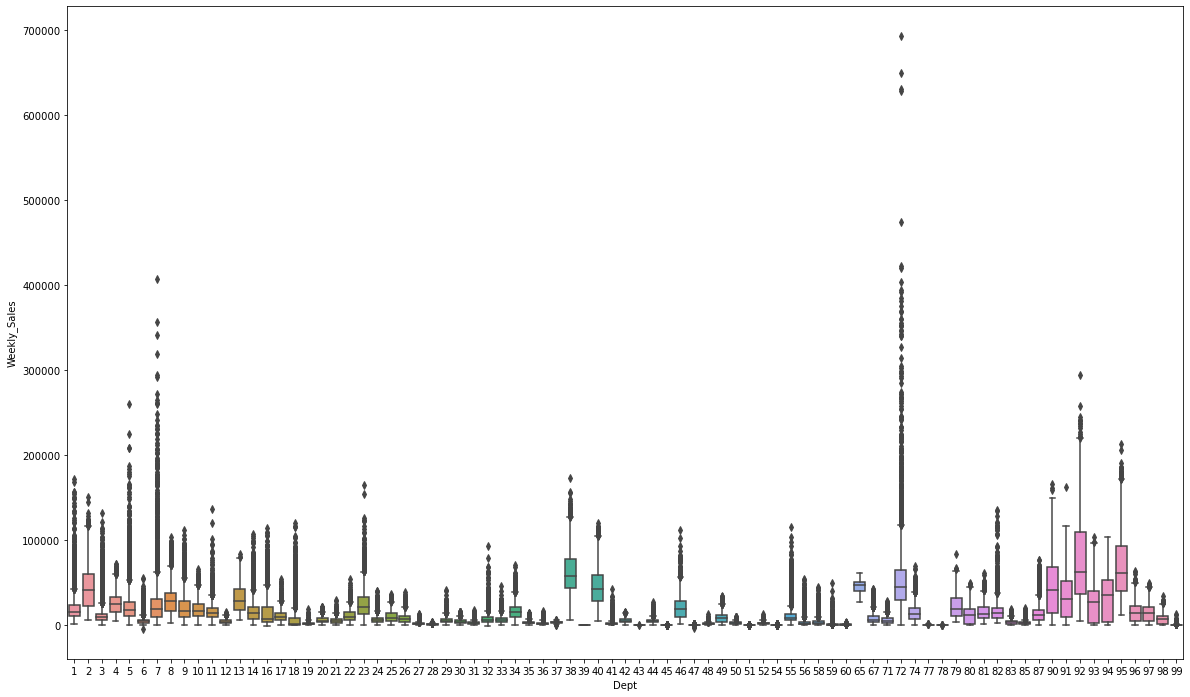

In [21]:
#Let's plot a graph to visualize weekly sales for each department
plt.figure(figsize=(20,12))
sns.boxplot(x='Dept', y='Weekly_Sales', data=retail_data) 

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

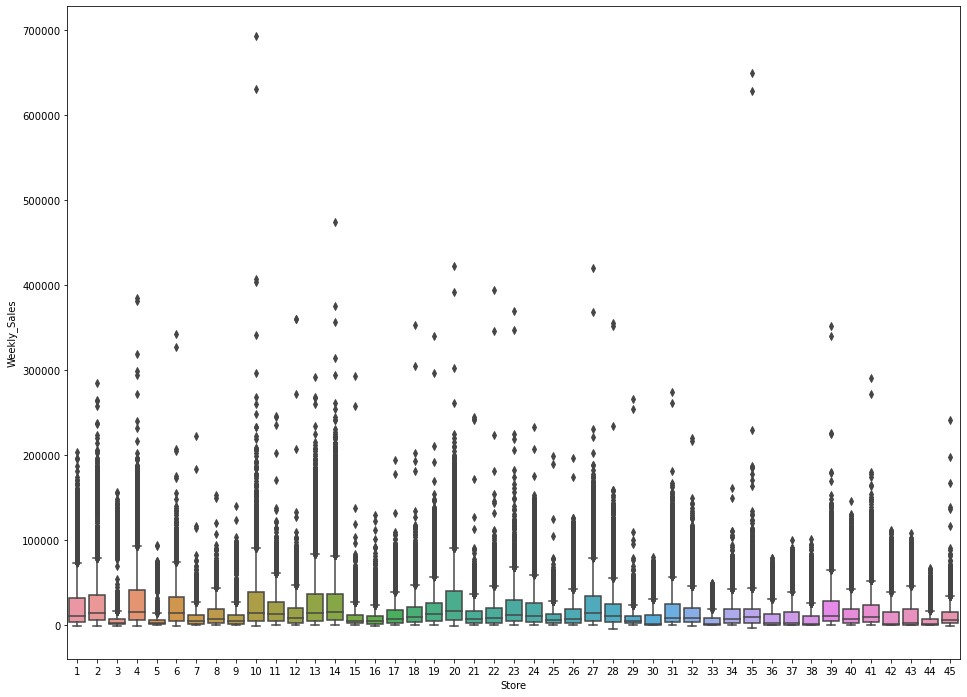

In [22]:
##Let's plot a graph to visualize weekly_sales for each store
plt.figure(figsize=(16,12))
sns.boxplot(x='Store', y='Weekly_Sales', data=retail_data) 

##### Grouping and agrregating 

In [61]:
#let's see what's the Average weekly sales for each individual store
AvgWeeklySales_perStore = retail_data.groupby('Store')['Weekly_Sales'].mean()
AvgWeeklySales_perStore.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [60]:
TotalWeeklySales_perStore = retail_data.groupby('Store')['Weekly_Sales'].sum()
TotalWeeklySales_perStore.head()

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [53]:
#Find out which stores has the highest average weekly_sales
AvgWeeklySales_perStore.nlargest(3)
#https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/

Store
20    29508.301592
4     29161.210415
14    28784.851727
Name: Weekly_Sales, dtype: float64

In [62]:
#Find out the top 3 stores with highest total weekly_sales
TotalWeeklySales_perStore.nlargest(3)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
Name: Weekly_Sales, dtype: float64

In [91]:
#Find out the which stores have least avearge weekly_sales
AvgWeeklySales_perStore.nsmallest(3)

Store
5     5053.415813
33    5728.414053
44    6038.929814
Name: Weekly_Sales, dtype: float64

In [72]:
#Stores that have least total weekly_sales
TotalWeeklySales_perStore.nsmallest(3)

Store
33    37160221.96
44    43293087.84
5     45475688.90
Name: Weekly_Sales, dtype: float64

In [23]:
#let's calculate the Average weekly sales for each department
#Ref: #state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
#state_avg_price.head()
AvgWeekly_sales_perDept = retail_data.groupby('Dept')['Weekly_Sales'].mean()
AvgWeekly_sales_perDept 

Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: Weekly_Sales, Length: 81, dtype: float64

In [64]:
TotalWeekly_sales_perDept = retail_data.groupby('Dept')['Weekly_Sales'].sum()
TotalWeekly_sales_perDept.head()

Dept
1    1.236388e+08
2    2.806112e+08
3    7.589245e+07
4    1.671467e+08
5    1.356074e+08
Name: Weekly_Sales, dtype: float64

In [73]:
#Find out the top 3 departments with highest average weekly_sales
AvgWeekly_sales_perDept.nlargest(3)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
Name: Weekly_Sales, dtype: float64

In [74]:
#Find out the top 3 departments with highest total weekly_sales
TotalWeekly_sales_perDept.nlargest(3)

Dept
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
Name: Weekly_Sales, dtype: float64

In [76]:
#Find out which departments have the lowest weekly_sales
TotalWeekly_sales_perDept.nsmallest(3)

Dept
47   -4962.93
43      14.32
39     177.98
Name: Weekly_Sales, dtype: float64

In [77]:
#Find out which departments have the lowest average weekly_sales
AvgWeekly_sales_perDept.nsmallest(3)

Dept
47   -7.682554
43    1.193333
78    7.296638
Name: Weekly_Sales, dtype: float64

In [34]:
#Now let's sum up the Date (column) according to their month
#df['Date'] = pd.to_datetime(df['Date'])
#df['Month'] = df['Date'].dt.month
retail_data['Date'] = pd.to_datetime(retail_data['Date'])
retail_data['Month'] = retail_data['Date'].dt.month
#Refer:https://stackoverflow.com/questions/51102615/get-month-from-date-column?answertab=votes#tab-top

In [35]:
retail_data.Month

0          5
1          5
2          5
3          5
4          5
          ..
421565    10
421566    10
421567    10
421568    10
421569    10
Name: Month, Length: 421570, dtype: int64

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Month'>

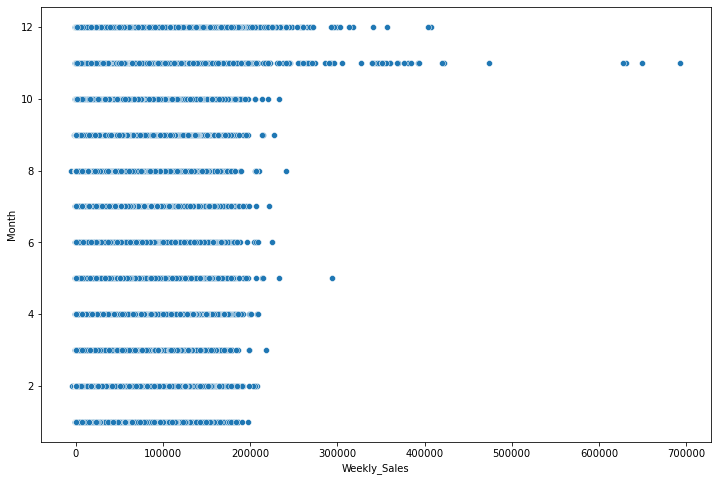

In [85]:
#Let's plot a scatter plot to see weekly_sales for every month.
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='Month', data=retail_data) # plot a box plot for this

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

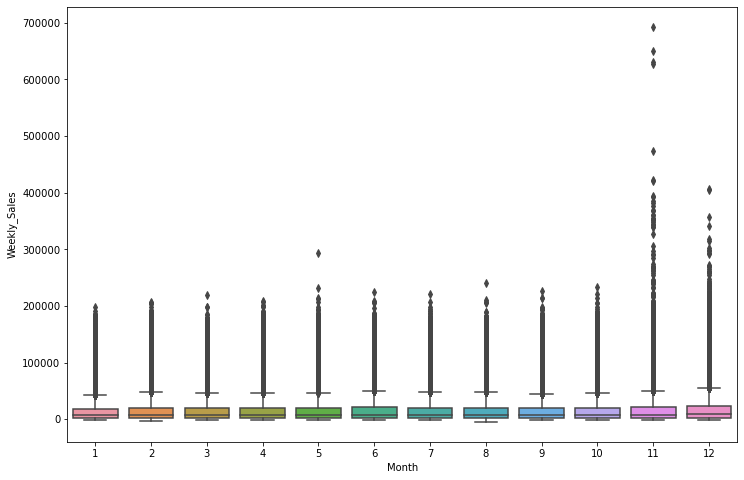

In [87]:
#Box plot for weekly-sales per month
plt.figure(figsize=(12,8))
sns.boxplot(x='Month', y='Weekly_Sales', data=retail_data) 

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

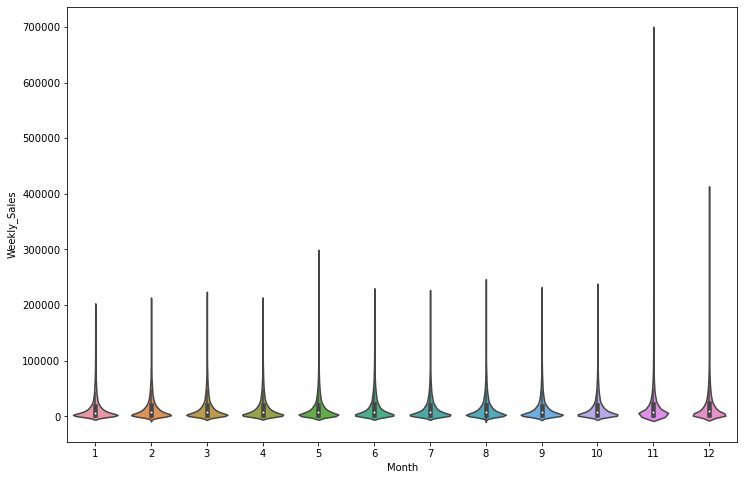

In [88]:
#Violin plot for weekly sales per month
plt.figure(figsize=(12,8))
sns.violinplot(x='Month', y='Weekly_Sales', data=retail_data) # plot a box plot for this

In [36]:
#Calculating the Weekly_sales per month 
TotalMonthly_sales = retail_data.groupby('Month')['Weekly_Sales'].sum()
TotalMonthly_sales

Month
1     4.264263e+08
2     5.220257e+08
3     5.534864e+08
4     6.453239e+08
5     6.056966e+08
6     5.750180e+08
7     5.933139e+08
8     5.642317e+08
9     5.905323e+08
10    6.029189e+08
11    4.591693e+08
12    5.990761e+08
Name: Weekly_Sales, dtype: float64

In [37]:
#let's also find the average weekly_sales per month , since the total is a very big number
AverageMonthly_sales = retail_data.groupby('Month')['Weekly_Sales'].mean()
AverageMonthly_sales

Month
1     14503.308110
2     16026.823127
3     15631.676728
4     15638.149799
5     15850.122787
6     16258.141930
7     15563.149206
8     16012.023938
9     15378.844836
10    15728.044488
11    17271.744814
12    18342.245834
Name: Weekly_Sales, dtype: float64

In [80]:
#Find out the top 3 Months with highest total_sales
TotalMonthly_sales.nlargest(3)

Month
4     6.453239e+08
5     6.056966e+08
10    6.029189e+08
Name: Weekly_Sales, dtype: float64

In [57]:
#Find out the top 3 Months with highest average_sales
AverageMonthly_sales.nlargest(3)

Month
12    18342.245834
11    17271.744814
6     16258.141930
Name: Weekly_Sales, dtype: float64

In [79]:
#Months with lowest sales
TotalMonthly_sales.nsmallest(3)

Month
1     4.264263e+08
11    4.591693e+08
2     5.220257e+08
Name: Weekly_Sales, dtype: float64

In [81]:
#Months with lowest average sales
AverageMonthly_sales.nsmallest(3)

Month
1    14503.308110
9    15378.844836
7    15563.149206
Name: Weekly_Sales, dtype: float64

In [41]:
retail_data['AvgWeeklySales_perStore'] = retail_data.groupby('Store')['Weekly_Sales'].mean() # are these extra columns 
                                                                                             #necessary?? 

In [43]:
retail_data['TotalWeeklySales_perStore'] = retail_data.groupby('Store')['Weekly_Sales'].sum()

In [44]:
retail_data.head(15)


Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0       1     1 2010-05-02      24924.50        False    A  151315   
1       1     2 2010-05-02      50605.27        False    A  151315   
2       1     3 2010-05-02      13740.12        False    A  151315   
3       1     4 2010-05-02      39954.04        False    A  151315   
4       1     5 2010-05-02      32229.38        False    A  151315   
5       1     6 2010-05-02       5749.03        False    A  151315   
6       1     7 2010-05-02      21084.08        False    A  151315   
7       1     8 2010-05-02      40129.01        False    A  151315   
8       1     9 2010-05-02      16930.99        False    A  151315   
9       1    10 2010-05-02      30721.50        False    A  151315   
10      1    11 2010-05-02      24213.18        False    A  151315   
11      1    12 2010-05-02       8449.54        False    A  151315   
12      1    13 2010-05-02      41969.29        False    A  151315   
13      1    14 2010-05-02      19466.91        False    A  151315   
14      1    16 2010-05-02      10217.55        False    A  151315   

    Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0         42.31       2.572        0.0        0.0        0.0        0.0   
1         42.31       2.572        0.0        0.0        0.0        0.0   
2         42.31       2.572        0.0        0.0        0.0        0.0   
3         42.31       2.572        0.0        0.0        0.0        0.0   
4         42.31       2.572        0.0        0.0        0.0        0.0   
5         42.31       2.572        0.0        0.0        0.0        0.0   
6         42.31       2.572        0.0        0.0        0.0        0.0   
7         42.31       2.572        0.0        0.0        0.0        0.0   
8         42.31       2.572        0.0        0.0        0.0        0.0   
9         42.31       2.572        0.0        0.0        0.0        0.0   
10        42.31       2.572        0.0        0.0        0.0        0.0   
11        42.31       2.572        0.0        0.0        0.0        0.0   
12        42.31       2.572        0.0        0.0        0.0        0.0   
13        42.31       2.572        0.0        0.0        0.0        0.0   
14        42.31       2.572        0.0        0.0        0.0        0.0   

    MarkDown5         CPI  Unemployment  IsHoliday_y  AvgWeeklySales_perStore  \
0         0.0  211.096358         8.106        False                      NaN   
1         0.0  211.096358         8.106        False             21710.543621   
2         0.0  211.096358         8.106        False             26898.070031   
3         0.0  211.096358         8.106        False              6373.033983   
4         0.0  211.096358         8.106        False             29161.210415   
5         0.0  211.096358         8.106        False              5053.415813   
6         0.0  211.096358         8.106        False             21913.243624   
7         0.0  211.096358         8.106        False              8358.766148   
8         0.0  211.096358         8.106        False             13133.014768   
9         0.0  211.096358         8.106        False              8772.890379   
10        0.0  211.096358         8.106        False             26332.303819   
11        0.0  211.096358         8.106        False             19276.762751   
12        0.0  211.096358         8.106        False             14867.308619   
13        0.0  211.096358         8.106        False             27355.136891   
14        0.0  211.096358         8.106        False             28784.851727   

    Month  TotalWeeklySales_perStore  
0       5                        NaN  
1       5               2.224028e+08  
2       5               2.753824e+08  
3       5               5.758674e+07  
4       5               2.995440e+08  
5       5               4.547569e+07  
6       5               2.237561e+08  
7       5               8.159828e+07  
8       5               1.299512e+

In [ ]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='Weekly_Sales', y='MarkDown1', data=retail_data) # plot a box plot for this

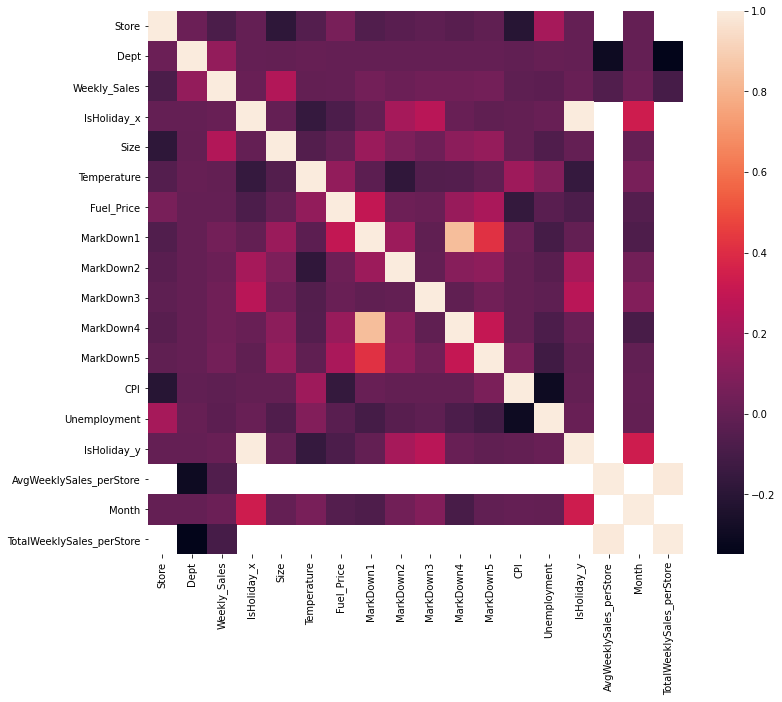

In [90]:
#Show a seaborn heatmap of correlations in retail_data
#call pandas' `corr()` method on `retail_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(retail_data.corr());